In [64]:
import os, json, numpy as np

json_filename = 'poly_v_clone_results.json'
with open(json_filename, 'r') as f:
    results = json.load(f)

trials = results['trials']
trials = [trial for trial in trials if trial.get("finalMetric", None) is not None]

hyperparameter_keys = trials[0]['hyperparameters'].keys()

print(hyperparameter_keys)

dict_keys(['stepsize-cross-entropy', 'lambda-baseline', 'stepsize-sigma', 'degree-polynomial', 'stepsize-mu', 'seed', 'lambda-center'])


In [69]:
hyperparam_values = {

}
ber_values = []
condition_key = 'degree-polynomial'
# condition_key = None
condition_upper = 2
condition_lower = 2
for trial in trials:
    if condition_key is not None:
        if not  condition_lower <= float(trial['hyperparameters'][condition_key]) <= condition_upper:
            continue
    for hyperparameter in hyperparameter_keys:
        hvals = hyperparam_values.get(hyperparameter, [])
        hvals += [trial['hyperparameters'][hyperparameter]]
        hyperparam_values[hyperparameter] = hvals
    ber_values += [trial['finalMetric']['objectiveValue']]
    

stepsize-cross-entropy 0.019573778254241437 0.019573778254241437
lambda-baseline 0.005187850945012679 0.005187850945012679
stepsize-sigma 0.0031447427414969344 0.0031447427414969344
degree-polynomial 2.083333333333333 2.083333333333333
stepsize-mu 0.293452721226949 0.293452721226949
lambda-center 0.08424570310506738 0.08424570310506738


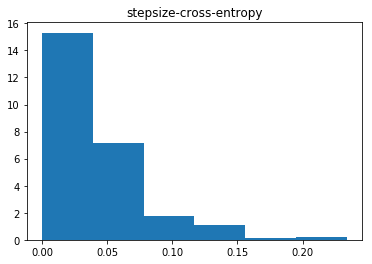

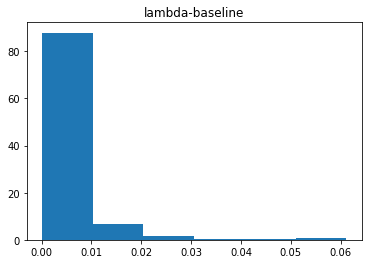

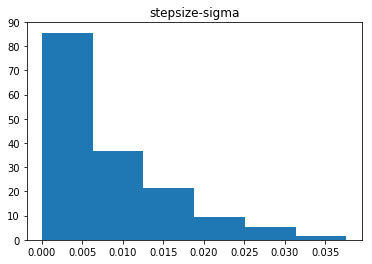

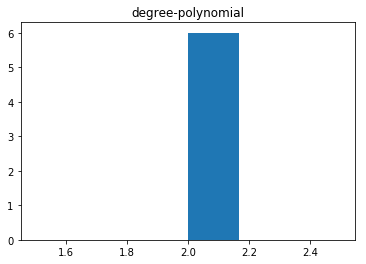

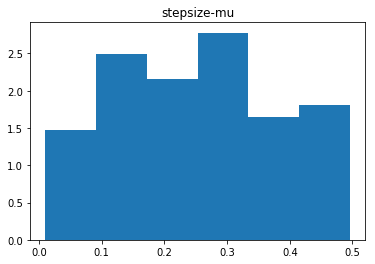

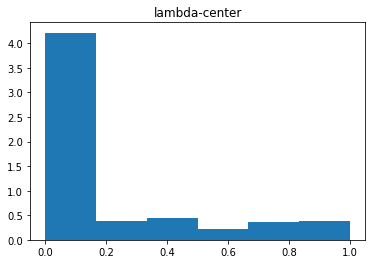

In [71]:
import matplotlib
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
ber_filter = .2
for hyperparameter in hyperparam_values.keys():
    if hyperparameter =='seed':
        continue
    x = []
    fig, ax = plt.subplots()
    for i, ber in enumerate(ber_values):
        if ber <= ber_filter:
            x += [float(hyperparam_values[hyperparameter][i])]
    ax.set_title(hyperparameter)
    bins = np.linspace(min(x), max(x))
    n, bins, patches = ax.hist(x, bins=6, density=True)
#     ax.xaxis.set_major_locator(plt.MultipleLocator(1))%%!
#     print(bins)
    print(hyperparameter, (bins[np.argmax(n)] + bins[np.argmax(n)+1])/2 ,(bins[np.argmax(n)] + bins[np.argmax(n)+1])/2)
#     plt.show()

In [ ]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
nbins = 20
ber_filter = .15
for hyperparameter in hyperparam_values.keys():
    plt.title(hyperparameter)
    paired_data = zip(hyperparam_values[hyperparameter], ber_values)
    paired_data = sorted(paired_data, key = lambda d: d[0])
    paired_data = [pair for pair in paired_data if pair[1] <= ber_filter]
#     min_x = paired_data[0][0]
#     max_x = paired_data[-1][0]
#     range = max_x - min_x
#     binsize = range / n_bins
    x, y = list(zip(*paired_data))
    plt.plot(x, y)
    plt.show()